# Loading the dataset

In [2]:
# 2. Load and clean
df = pd.read_csv(r"C:\Users\Mayur\Documents\MO\updated_mf_data.csv")
df = df.drop_duplicates().dropna(subset=["WillBuyMutualFund"])

In [3]:
df.shape

(49602, 26)

In [4]:
df.head()

,ID,Age,Profession,City,Income,InvestmentExperience,RiskTolerance,InvestmentGoal,Gender,clientcategory,...,TimeSpent,Is_IAP_Active,IS_BrokingAccount_Active,InsuranceHeld,FD_Bond,AIF_Active,DematHoldingType,DematQty,Holding Amount,WillBuyMutualFund
0,45905,51.226996,IT,Delhi,5.709565e+05,8.311350,Low,Balanced,Male,OCR,...,NaN,Yes,Yes,No,FD,No,MutualFund,60.632932,NaN,1.0
1,39619,76.235189,Teacher,Coimbatore,3.665932e+05,4.561759,High,Growth,Male,Digital,...,68.840863,No,Yes,Yes,Bond,NO,ETF,160.317291,30594.847968,1.0
2,38122,45.822252,Manager,Pune,2.196230e+06,6.041113,Low,Growth,Female,OCR,...,77.170915,No,No,No,Bond,No,Equity,158.865761,252125.673324,1.0
3,35870,44.101343,Doctor,Chennai,NaN,4.955067,Medium,Balanced,Male,OCR,...,97.014046,No,No,No,Bond,Yes,MutualFund,NaN,NaN,0.0
4,20481,28.509945,IT,Pune,3.330627e+06,4.175497,Medium,Balanced,Female,Manual,...,16.774076,No,Yes,Yes,FD,No,Equity,76.432889,NaN,0.0


In [5]:
summary = pd.DataFrame({
    "dtype": df.dtypes,
    "unique_values": df.nunique(),
    "missing_values": df.isna().sum()
})

summary


,dtype,unique_values,missing_values
ID,int64,49403,0
Age,float64,45230,1496
Profession,object,30,60
City,object,32,0
Income,float64,46795,2481
InvestmentExperience,float64,42890,1986
RiskTolerance,object,15,126
InvestmentGoal,object,15,62
Gender,object,11,62
clientcategory,object,5,0


In [6]:
for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False).head(10))  # top 10 values



--- ID ---
ID
38083    3
30798    2
6257     2
7159     2
2035     2
18633    2
38239    2
29879    2
30752    2
17058    2
Name: count, dtype: int64

--- Age ---
Age
18.000000    2671
NaN          1496
85.000000     117
68.268505       2
38.317126       2
48.671595       2
62.866930       2
38.104049       2
30.184039       2
37.384217       2
Name: count, dtype: int64

--- Profession ---
Profession
Engineer      5959
Manager       5930
Accountant    3927
IT            3836
Consultant    3398
Doctor        2936
Analyst       2868
Finance       2571
Sales         2520
Lawyer        2444
Name: count, dtype: int64

--- City ---
City
Kolkata      2713
Mumbai       2621
Bangalore    2607
Hyderabad    2602
Delhi        2600
Pune         2594
Chennai      2562
Kochi        1627
Vadodara     1602
Nagpur       1598
Name: count, dtype: int64

--- Income ---
Income
 NaN             2481
-5.000000e+04      67
 1.000000e+08      63
 5.000000e+07      54
 0.000000e+00      51
 1.009418e+05       2

# Cleaning

In [21]:
def clean_dataset(df):
    df = df.copy()

    # Drop ID if present
    if "ID" in df.columns:
        df = df.drop(columns=["ID"])

    # ---- Gender cleanup ----
    if "Gender" in df.columns:
        df["Gender"] = df["Gender"].str.strip().str.lower()
        df["Gender"] = df["Gender"].replace({
            "male": "Male", "m": "Male",
            "female": "Female", "f": "Female",
            "other": "Other","woman":"Female","man":"Male"
        })

    # ---- RiskTolerance cleanup ----
    if "RiskTolerance" in df.columns:
        df["RiskTolerance"] = df["RiskTolerance"].str.strip().str.lower()
        df["RiskTolerance"] = df["RiskTolerance"].replace({
            "low": "Low", "l": "Low",
            "medium": "Medium", "med": "Medium", "m": "Medium",
            "high": "High", "h": "High","unknow": "Unknown",'hi':'High'
        })

    # ---- InvestmentGoal cleanup ----
    if "InvestmentGoal" in df.columns:
        df["InvestmentGoal"] = df["InvestmentGoal"].str.strip().str.lower()
        df["InvestmentGoal"] = df["InvestmentGoal"].replace({
            "growth": "Growth", "growht": "Growth","grwoth": "Growth",
            "balanced": "Balanced",
            "income": "Income",
            "conservative": "Conservative"
        })

    # ---- CallOutcome cleanup ----
    if "CallOutcome" in df.columns:
        df["CallOutcome"] = df["CallOutcome"].str.strip().str.lower()
        df["CallOutcome"] = df["CallOutcome"].replace({
            "interested": "Interested", "intrested": "Interested",
            "converted": "Converted",
            "not interested": "Not Interested","not-interested": "Not Interested",
            "follow up":"follow up","followup":"follow up","follow-up":"follow up"
        })

    # ---- Binary fields cleanup ----
    binary_fields = ["Is_IAP_Active", "IS_BrokingAccount_Active",
                     "InsuranceHeld", "AIF_Active"]
    for col in binary_fields:
        if col in df.columns:
            df[col] = df[col].astype(str).str.strip().str.lower()
            df[col] = df[col].replace({
                "yes": "Yes", "y": "Yes", "1": "Yes", "true": "Yes","tru": "Yes",
                "no": "No", "n": "No", "0": "No", "false": "No","fal": "No"
            })

    # ---- FD_Bond cleanup ----
    if "FD_Bond" in df.columns:
        df["FD_Bond"] = df["FD_Bond"].str.strip().str.lower()
        df["FD_Bond"] = df["FD_Bond"].replace({
            "fd": "FD", "bond": "Bond", "both": "Both", "fd,bond": "Both"
        })

    # ---- DematHoldingType cleanup ----
    if "DematHoldingType" in df.columns:
        df["DematHoldingType"] = df["DematHoldingType"].str.strip().str.lower()
        df["DematHoldingType"] = df["DematHoldingType"].replace({
            "equity": "Equity", "equities": "Equity",
            "mutualfund": "MutualFund",
            "bond": "Bond", "commodity": "Commodity",
            "etf": "ETF", "mixed": "Mixed"
        })

   

    # ---- Binning continuous vars ----
    if "Age" in df.columns:
        df["AgeBin"] = pd.cut(df["Age"], bins=[0, 30, 45, 60, 100],
                              labels=["Young", "MidCareer", "PreRetire", "Senior"])
    if "Income" in df.columns:
        df["IncomeBin"] = pd.qcut(df["Income"].rank(method="first"), q=3,
                                  labels=["Low", "Mid", "High"])
    if "HoldingAmount" in df.columns:
        df["HoldingBin"] = pd.qcut(df["HoldingAmount"].rank(method="first"), q=3,
                                   labels=["Small", "Medium", "Large"])
    return df

In [22]:
df = clean_dataset(df)

In [40]:
# ---- Date features ----
for col in ["ClickEventDate", "CallDate"]:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")
        df[f"{col}_Month"] = df[col].dt.month
        df[f"{col}_DayOfWeek"] = df[col].dt.dayofweek
        df[f"{col}_IsWeekend"] = (df[col].dt.dayofweek >= 5).astype(int)

# Days between click and call
if "ClickEventDate" in df.columns and "CallDate" in df.columns:
    df["Days_ClickToCall"] = (df["CallDate"] - df["ClickEventDate"]).dt.days
    df["Days_ClickToCall"] = df["Days_ClickToCall"].fillna(df["Days_ClickToCall"].median())

# Drop raw dates (model doesn’t need them directly)
df = df.drop(columns=["ClickEventDate", "CallDate"], errors="ignore")


In [41]:
for col in df.columns:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False).head(10))  # top 10 values


--- Age ---
Age
18.000000    2671
NaN          1496
85.000000     117
68.268505       2
38.317126       2
48.671595       2
62.866930       2
38.104049       2
30.184039       2
37.384217       2
Name: count, dtype: int64

--- Profession ---
Profession
Engineer      5959
Manager       5930
Accountant    3927
IT            3836
Consultant    3398
Doctor        2936
Analyst       2868
Finance       2571
Sales         2520
Lawyer        2444
Name: count, dtype: int64

--- City ---
City
Kolkata      2713
Mumbai       2621
Bangalore    2607
Hyderabad    2602
Delhi        2600
Pune         2594
Chennai      2562
Kochi        1627
Vadodara     1602
Nagpur       1598
Name: count, dtype: int64

--- Income ---
Income
 NaN             2481
-5.000000e+04      67
 1.000000e+08      63
 5.000000e+07      54
 0.000000e+00      51
 1.009418e+05       2
 1.191675e+05       2
 3.298286e+06       2
 3.573527e+06       2
 3.285541e+06       2
Name: count, dtype: int64

--- InvestmentExperience ---
Invest

In [42]:
df.head()

,Age,Profession,City,Income,InvestmentExperience,RiskTolerance,InvestmentGoal,Gender,clientcategory,CallType,...,WillBuyMutualFund,AgeBin,IncomeBin,ClickEventDate_Month,ClickEventDate_DayOfWeek,ClickEventDate_IsWeekend,CallDate_Month,CallDate_DayOfWeek,CallDate_IsWeekend,Days_ClickToCall
0,51.226996,IT,Delhi,5.709565e+05,8.311350,Low,Balanced,Male,OCR,Inbound,...,1.0,PreRetire,Low,10.0,6.0,1,2.0,2.0,0,-242.0
1,76.235189,Teacher,Coimbatore,3.665932e+05,4.561759,High,Growth,Male,Digital,Outbound,...,1.0,Senior,Low,NaN,NaN,0,5.0,1.0,0,-92.0
2,45.822252,Manager,Pune,2.196230e+06,6.041113,Low,Growth,Female,OCR,In-bound,...,1.0,PreRetire,High,NaN,NaN,0,7.0,4.0,0,-92.0
3,44.101343,Doctor,Chennai,NaN,4.955067,Medium,Balanced,Male,OCR,Outbound,...,0.0,MidCareer,NaN,11.0,1.0,0,9.0,3.0,0,-61.0
4,28.509945,IT,Pune,3.330627e+06,4.175497,Medium,Balanced,Female,Manual,Outbound,...,0.0,Young,High,NaN,NaN,0,NaN,NaN,0,-92.0


In [43]:
df.columns

Index(['Age', 'Profession', 'City', 'Income', 'InvestmentExperience',
       'RiskTolerance', 'InvestmentGoal', 'Gender', 'clientcategory',
       'CallType', 'CallDuration', 'CallOutcome', 'PageVisited', 'TimeSpent',
       'Is_IAP_Active', 'IS_BrokingAccount_Active', 'InsuranceHeld', 'FD_Bond',
       'AIF_Active', 'DematHoldingType', 'DematQty', 'Holding Amount',
       'WillBuyMutualFund', 'AgeBin', 'IncomeBin', 'ClickEventDate_Month',
       'ClickEventDate_DayOfWeek', 'ClickEventDate_IsWeekend',
       'CallDate_Month', 'CallDate_DayOfWeek', 'CallDate_IsWeekend',
       'Days_ClickToCall'],
      dtype='object')

In [44]:
X = df.drop(columns=["WillBuyMutualFund"])
y = df["WillBuyMutualFund"]

# 3. Preprocessing pipeline

In [45]:
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

preprocessor = ColumnTransformer([
    ("num", SimpleImputer(strategy="median"), num_cols),
    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]), cat_cols)
])

# 4. Train-test split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 5. Apply preprocessing + SMOTEENN

In [47]:
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc = preprocessor.transform(X_test)

smoteenn = SMOTEENN(random_state=42)
X_train_res, y_train_res = smoteenn.fit_resample(X_train_proc, y_train)

print("Original train:", X_train.shape, "Resampled:", X_train_res.shape)


Original train: (39681, 31) Resampled: (31747, 155)


# 6. Define models

In [48]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=500, class_weight="balanced", random_state=42),
    "DecisionTree": DecisionTreeClassifier(max_depth=10, class_weight="balanced", random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=200, max_depth=10, class_weight="balanced", random_state=42),
    "XGBoost": XGBClassifier(n_estimators=500, max_depth=6, learning_rate=0.05,
                             subsample=0.8, colsample_bytree=0.8,
                             eval_metric="logloss", random_state=42, n_jobs=-1)
}

results = []
best_model, best_thresh = None, 0

# 7. Train + threshold tuning

In [49]:
for name, model in models.items():
    print(f"\n🚀 Training {name}...")
    model.fit(X_train_res, y_train_res)

    y_proba = model.predict_proba(X_test_proc)[:, 1]
    thresholds = np.linspace(0.1, 0.9, 81)

    best_bal_acc, best_f1, best_t = 0, 0, 0.5
    for t in thresholds:
        y_pred_t = (y_proba >= t).astype(int)
        bal_acc = balanced_accuracy_score(y_test, y_pred_t)
        f1 = f1_score(y_test, y_pred_t)
        if bal_acc > best_bal_acc:
            best_bal_acc, best_f1, best_t = bal_acc, f1, t

    y_pred_final = (y_proba >= best_t).astype(int)
    roc_auc = roc_auc_score(y_test, y_proba)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)

    print(f"✅ {name} Best Threshold: {best_t:.2f}")
    print(f"Balanced Acc: {best_bal_acc:.4f}, F1: {best_f1:.4f}, ROC AUC: {roc_auc:.4f}, PR AUC: {pr_auc:.4f}")
    print("Classification Report:\n", classification_report(y_test, y_pred_final, digits=4))

    results.append((name, best_bal_acc, best_f1, roc_auc, pr_auc))

    # Save best model
    if best_model is None or best_bal_acc > max(r[1] for r in results[:-1]):
        best_model, best_thresh = model, best_t



🚀 Training LogisticRegression...
✅ LogisticRegression Best Threshold: 0.50
Balanced Acc: 0.5466, F1: 0.5816, ROC AUC: 0.5533, PR AUC: 0.8707
Classification Report:
               precision    recall  f1-score   support

         0.0     0.1693    0.6588    0.2693      1477
         1.0     0.8792    0.4345    0.5816      8444

    accuracy                         0.4679      9921
   macro avg     0.5242    0.5466    0.4255      9921
weighted avg     0.7735    0.4679    0.5351      9921


🚀 Training DecisionTree...
✅ DecisionTree Best Threshold: 0.81
Balanced Acc: 0.5847, F1: 0.8360, ROC AUC: 0.5831, PR AUC: 0.8714
Classification Report:
               precision    recall  f1-score   support

         0.0     0.2429    0.3724    0.2940      1477
         1.0     0.8789    0.7970    0.8360      8444

    accuracy                         0.7338      9921
   macro avg     0.5609    0.5847    0.5650      9921
weighted avg     0.7842    0.7338    0.7553      9921


🚀 Training RandomForest..

# 8. Compare models

In [50]:
results_df = pd.DataFrame(results, columns=["Model", "BalancedAcc", "F1", "ROC_AUC", "PR_AUC"])
print("\n📊 Model Comparison:\n", results_df.sort_values("BalancedAcc", ascending=False))



📊 Model Comparison:
                 Model  BalancedAcc        F1   ROC_AUC    PR_AUC
2        RandomForest     0.606211  0.773782  0.629932  0.889790
3             XGBoost     0.592165  0.786250  0.620087  0.889364
1        DecisionTree     0.584696  0.835973  0.583140  0.871409
0  LogisticRegression     0.546639  0.581596  0.553319  0.870708


# 9. Feature importance (for best tree-based model)

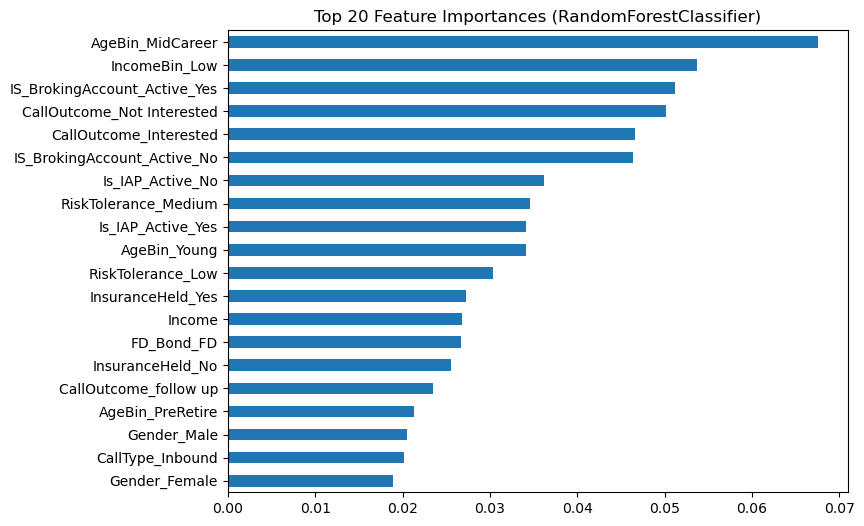

In [51]:
if hasattr(best_model, "feature_importances_"):
    feature_names = preprocessor.transformers_[0][2] + list(
        preprocessor.named_transformers_["cat"]["encoder"].get_feature_names_out(cat_cols)
    )
    feat_imp = pd.Series(best_model.feature_importances_, index=feature_names).sort_values(ascending=False).head(20)

    plt.figure(figsize=(8,6))
    feat_imp.plot(kind="barh")
    plt.title(f"Top 20 Feature Importances ({type(best_model).__name__})")
    plt.gca().invert_yaxis()
    plt.show()

In [54]:
if hasattr(best_model, "feature_importances_"):
    feature_names = preprocessor.transformers_[0][2] + list(
        preprocessor.named_transformers_["cat"]["encoder"].get_feature_names_out(cat_cols)
    )
    feat_imp = pd.Series(best_model.feature_importances_, index=feature_names).sort_values(ascending=False)#.head(20)
    feat_imp

In [55]:
feat_imp

AgeBin_MidCareer                0.067598
IncomeBin_Low                   0.053730
IS_BrokingAccount_Active_Yes    0.051232
CallOutcome_Not Interested      0.050179
CallOutcome_Interested          0.046627
                                  ...   
AIF_Active_nan                  0.000015
Profession_Engi­neer            0.000014
CallType_INBOUND                0.000014
Profession_Acountant            0.000006
Profession_manager              0.000004
Length: 155, dtype: float64

In [60]:
import joblib

# Save pipeline with preprocessing + model
joblib.dump(best_model, "mutual_fund_model.pkl")


['mutual_fund_model.pkl']

In [62]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBClassifier
import joblib

# Example: build preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), ["Age", "Income", "Holding Amount", "InvestmentExperience"]),  # FIXED: space in name
        ("cat", OneHotEncoder(handle_unknown="ignore"), 
         ["Gender", "Profession", "RiskTolerance", "InvestmentGoal"])
    ]
)

# Final pipeline
clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", XGBClassifier(random_state=42))
])

# Train
clf.fit(X_train, y_train)

# Save full pipeline
joblib.dump(clf, "mf_pipeline.pkl")


['mf_pipeline.pkl']